<a href="https://colab.research.google.com/github/shubhamgautam1211/Machine-Learning-Standalone/blob/main/SG_19_Boosting_SpokenDigitClassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spoken Digit Classification (Boosting)**


In [ ]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from scipy import signal
import numpy as np
from scipy import signal as sig
from scipy.fft import fft, fftshift
import librosa
import librosa.display
import wave
import random as rn
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset.git

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 4185, done.
remote: Counting objects: 100% (513/513), done.
remote: Compressing objects: 100% (513/513), done.
remote: Total 4185 (delta 4), reused 501 (delta 0), pack-reused 3672
Receiving objects: 100% (4185/4185), 30.44 MiB | 28.34 MiB/s, done.
Resolving deltas: 100% (81/81), done.


# **Reading Dataset:**

Read the audio using any library.

File formats in .wav which can be read using any audio library.

Extract the STFT features from the audio. STFT (Short Term Fourier Transform) is a frequency feature representation for audio.

### **This can be handled in either one of the two ways.**

**1)** Standard size of STFT features can be extracted from middle of each 
audio samples, then that 2D matrix can be flattened 

**2)** Taking average frequency across time from STFT features.

In [ ]:
#For testing Librosa stft for a single audio
audio_path = '/content/free-spoken-digit-dataset/recordings/2_lucas_3.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


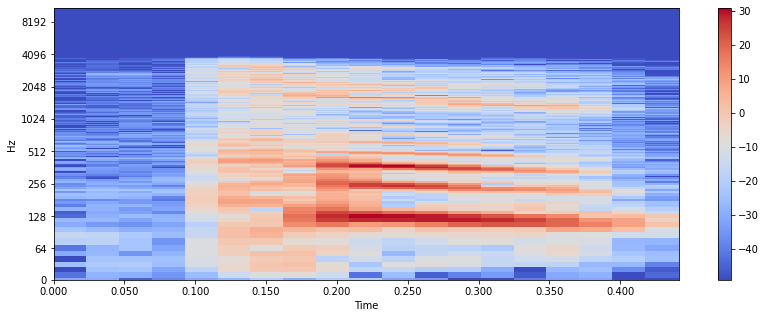

In [ ]:
#For testing Librosa stft for a single audio and visualising the graph
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
Xdb.shape
plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
data_dir='/content/free-spoken-digit-dataset/recordings'
filenames=[]
for i in os.listdir(data_dir):
    filenames.append(i)
rn.shuffle(filenames)

#**Training set, Testing set and Labels**

**(1) X will contain the STFT features of each audio sample, where Y will contain the target audio class label.**

**(2) Split the dataset (75% training and 25% testing) into training and testing sets with STFT audio features as input, audio class as target label**

In [ ]:
test_speaker='theo'
train_x=[]
train_y=[]
test_x=[]
test_y=[]
pad2d= lambda a, i: a[:,0:i] if a.shape[1]>i else np.hstack((a, np.zeros((a.shape[0],i-a.shape[1]))))
for i in range(len(filenames)):
    struct=filenames[i].split('_')
    digit=struct[0]
    speaker=struct[1]
    wav,sr=librosa.load(os.path.join(data_dir,filenames[i]))
    x=librosa.feature.mfcc(wav)
    padded_x=pad2d(x,40)
    if speaker==test_speaker:
        test_x.append(padded_x.flatten())
        test_y.append(int(digit))
    else:
        train_x.append(padded_x.flatten())
        train_y.append(int(digit))

In [ ]:
train_x=np.array(train_x)
test_x=np.array(test_x)
train_ex=np.expand_dims(train_x,-1)
test_ex=np.expand_dims(test_x,-1)
train_ex=np.reshape(train_ex,(2500,800))
test_ex=np.reshape(test_ex,(500,800))
train_y=np.array(train_y)

In [ ]:
train_ex.shape

(2500, 800)

## **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=500,random_state=0)
model.fit(train_ex,train_y)
print("Score for Adaboost")
model.score(test_ex,test_y)

Score for Adaboost


0.504

## **GradientBoost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,random_state=0, max_depth=1)
model.fit(train_ex,train_y)
print("Score for GradientBoost")
model.score(test_ex,test_y)

Score for GradientBoost


0.52